In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dataset=pd.read_csv('heart.csv')

In [12]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [13]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

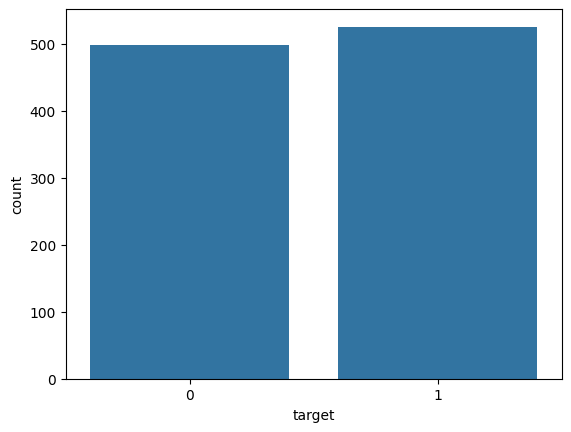

In [15]:
sns.countplot(x='target',data=dataset)

<Axes: >

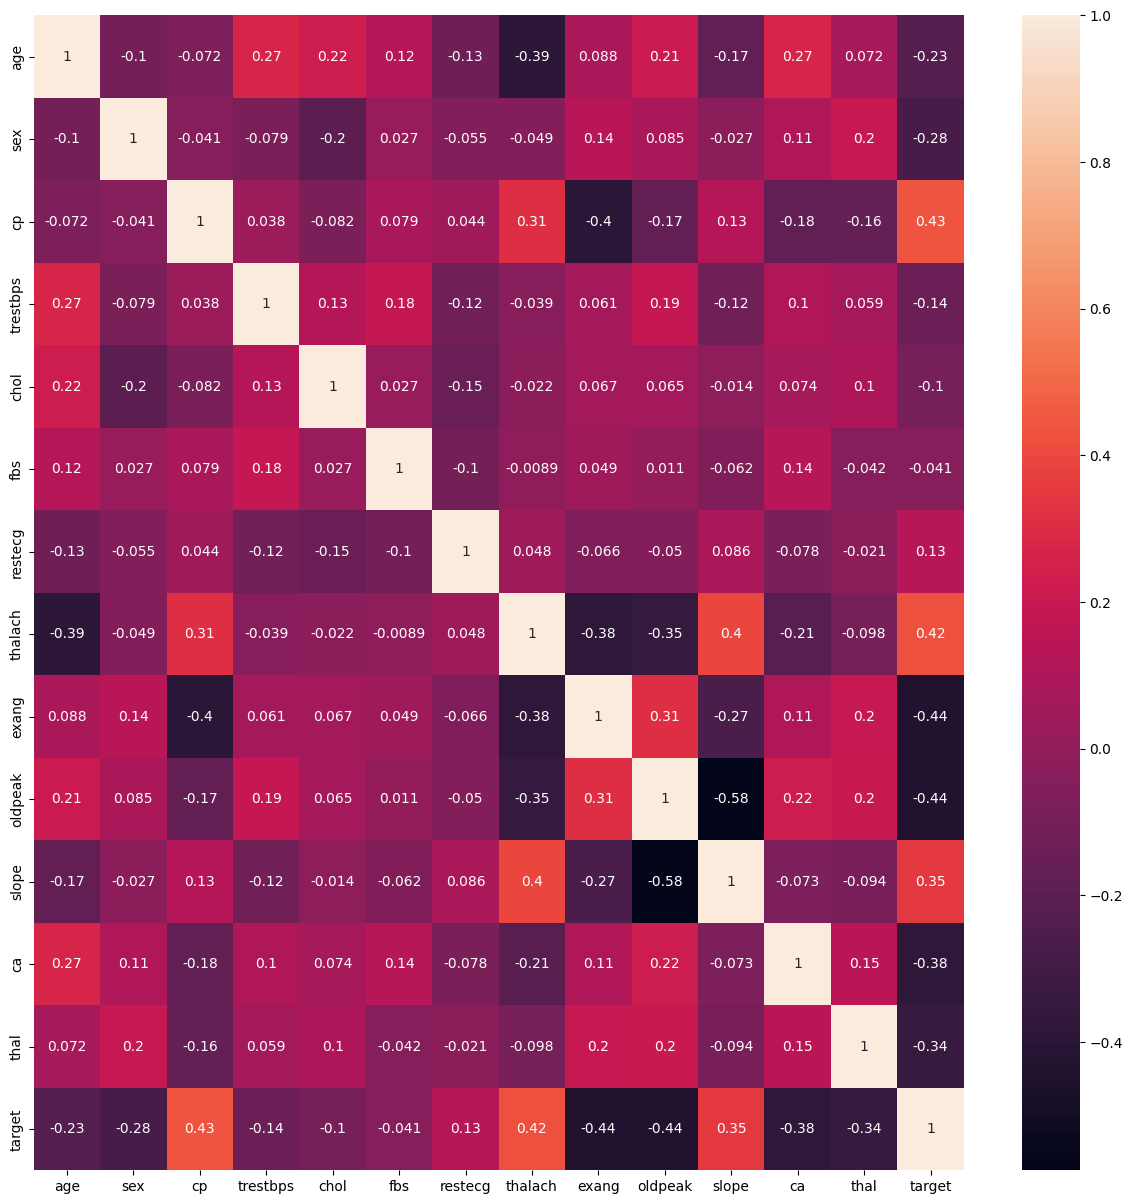

In [16]:
corr_mat=dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat,annot=True)


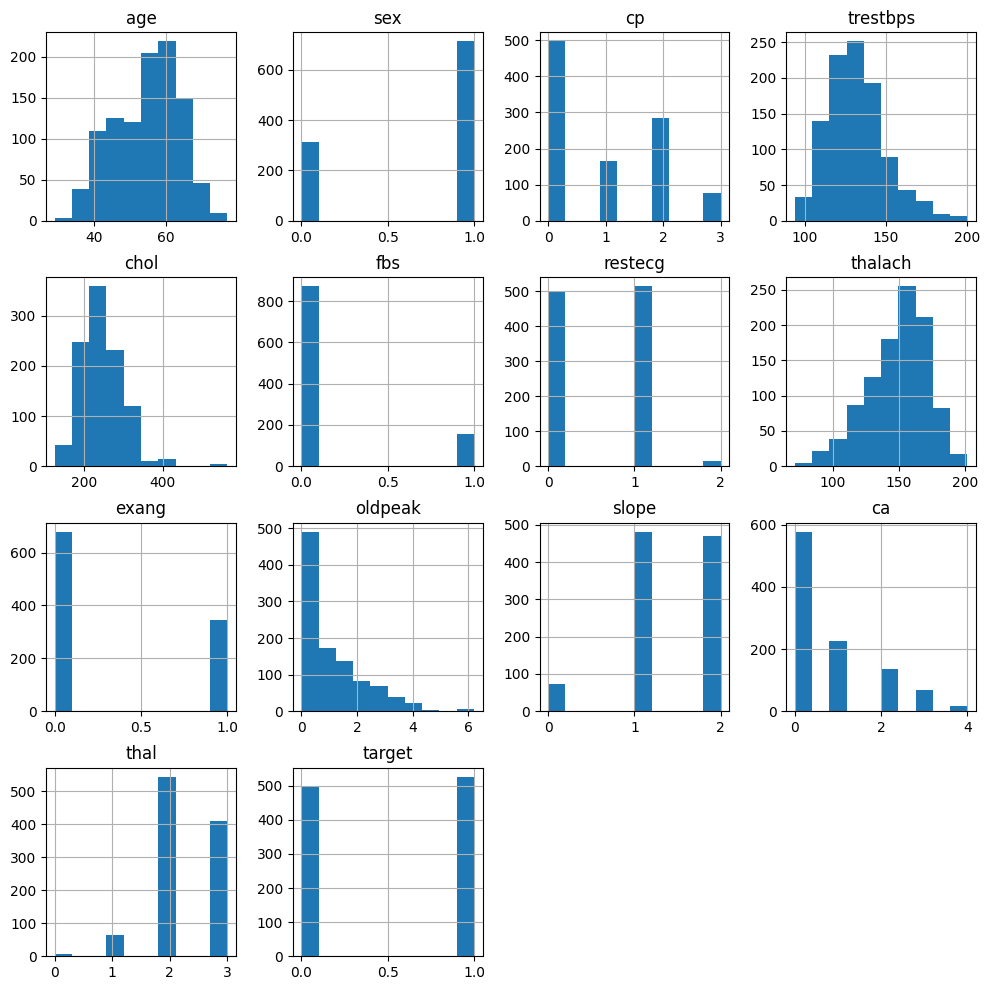

In [17]:
dataset.hist(figsize=(12,12))
plt.show()

In [18]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
dataset2=pd.get_dummies(dataset,columns=['sex','cp','fbs','restecg','exang'])

In [20]:
dataset2.tail()

,age,trestbps,chol,thalach,oldpeak,slope,ca,thal,target,sex_0,...,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
1020,59,140,221,164,0.0,2,0,2,1,False,...,True,False,False,True,False,False,True,False,False,True
1021,60,125,258,141,2.8,1,1,3,0,False,...,False,False,False,True,False,True,False,False,False,True
1022,47,110,275,118,1.0,1,1,2,0,False,...,False,False,False,True,False,True,False,False,False,True
1023,50,110,254,159,0.0,2,0,2,1,True,...,False,False,False,True,False,True,False,False,True,False
1024,54,120,188,113,1.4,1,1,3,0,False,...,False,False,False,True,False,False,True,False,True,False


In [21]:
cols = ['cp_0','cp_1','cp_2','cp_3', 'trestbps', 'chol', 'fbs_0','fbs_1', 'restecg_0','restecg_1','restecg_2', 'thalach', 'exang_0','exang_1']


In [22]:
X = dataset2[cols]
y = dataset2.target

In [23]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # Adjust cv as needed


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
data = pd.read_csv('heart.csv')

# Split the data into features and target
X = data.drop('target', axis=1)  # Features
y = data['target']                # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Transform the test data

# Create and fit the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)  # Fit the model on the original training data (DataFrame)

# Now you can predict using the same model
y_pred = model.predict(X_test)  # Predict using the original test data (DataFrame)

# Print results
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[74 28]
 [27 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [29]:
y_pred = model.predict(X_test)



In [30]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline

# Load your dataset
data = pd.read_csv('heart.csv')
X = data.drop('target', axis=1)  # Adjust based on your dataset's actual column names
y = data['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features and create a pipeline for KNN
scaler = StandardScaler()
knn_model = KNeighborsClassifier(n_neighbors=5)

# Combine scaling and model into a pipeline
pipeline = Pipeline([('scaler', scaler), ('knn', knn_model)])
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

# Cross-validate with pipeline (using scaled data automatically)
cross_val_scores = cross_val_score(pipeline, X, y, cv=5)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)
print("Cross-validated scores:", cross_val_scores)


Confusion Matrix:
 [[79 23]
 [11 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

ROC AUC Score: 0.9485532076908434
Cross-validated scores: [0.86341463 0.83902439 0.81463415 0.83414634 0.81463415]


In [51]:
print(X_train.shape)


(820, 13)


In [52]:
(227, 14)

(227, 14)

In [53]:
X_test.shape

(205, 13)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)


In [55]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train , y_train)

KNeighborsClassifier()

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,68,1,2,118,277,0,1,151,0,1.0,2,1,3
796,41,1,1,135,203,0,1,132,0,0.0,1,0,1
644,44,1,2,120,226,0,1,169,0,0.0,2,0,2
404,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [60]:
y_pred


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

<Axes: >

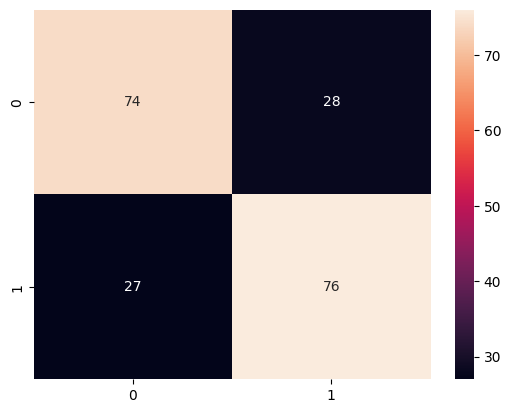

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.7317073170731707

In [39]:
import pickle
pickle.dump(classifier , open('model.pkl' , 'wb'))
pickle.dump(sc , open('sc.pkl','wb'))

In [40]:
import pickle

In [41]:
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
    print("Model loaded successfully!")

Model loaded successfully!


In [42]:
import os
print(os.getcwd())


c:\Users\sarat\Documents\HeartDiseasePredection


In [43]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('heart.csv')

# Define the features and target
X = data.drop(columns=['target'])  # Adjust 'target' based on your dataset's label column name
y = data['target']  # Adjust if necessary

# Create and fit the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
with open('sc.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler saved as sc.pkl")


Scaler saved as sc.pkl


In [44]:
import pandas as pd
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('heart.csv')

# Define the features and target
X = data.drop(columns=['target'])  # Adjust 'target' based on your dataset's label column name
y = data['target']  # Adjust if necessary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as model.pkl")


Model saved as model.pkl


In [45]:
import numpy as np
import pandas as pd  # Import pandas
import pickle

# Load model and scaler
try:
    sc = pickle.load(open('sc.pkl', 'rb'))
    model = pickle.load(open('model.pkl', 'rb'))
except Exception as e:
    print(f"Error loading model or scaler: {e}")
    exit()

# Prepare input data for high risk
# Create a DataFrame with feature names
input_data = pd.DataFrame({
    'age': [60],
    'sex': [1],
    'cp': [2],
    'trestbps': [150],
    'chol': [250],
    'fbs': [1],
    'restecg': [1],
    'thalach': [120],
    'exang': [1],
    'oldpeak': [2.5],
    'slope': [0],
    'ca': [3],
    'thal': [2]
})

# Scale the input data
scaled_data = sc.transform(input_data)

# Make a prediction
prediction_proba = model.predict_proba(scaled_data)[0]
prediction = np.argmax(prediction_proba)
confidence = prediction_proba[prediction] * 100

print(f"Prediction: {prediction}, Confidence: {confidence}%")


Prediction: 0, Confidence: 100.0%


c:\Users\sarat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [93]:
pip install numpy pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd

# Load your dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


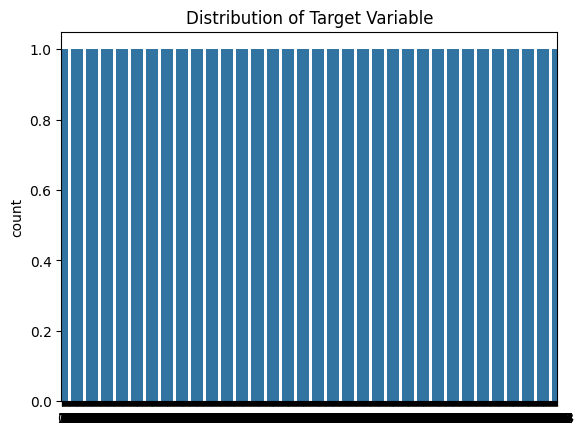

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(data['target'])
plt.title('Distribution of Target Variable')
plt.show()


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNeighbors Classifier
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[79 23]
 [11 92]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load dataset
data = pd.read_csv('heart.csv')

# Preprocessing
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)

# Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validated scores:", cv_scores)


Confusion Matrix:
 [[79 23]
 [11 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

ROC AUC Score: 0.9485532076908434
Cross-validated scores: [0.86341463 0.83902439 0.81463415 0.83414634 0.81463415]


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Load your dataset
data = pd.read_csv('heart.csv')

# Separate features and target
X = data.drop('target', axis=1)  # Use the actual column name for the target
y = data['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

# Train the model
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

# Save the model and scaler
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('sc.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)
